# Kaggle Competiion - Give me some credit

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

# Evaluation

AUC - It is a performance evaluation for a classification problem. It tells how much model is capable of distinguishing between classes. AUC lies between 0 and 1, the higher the auc towards 1 the better. The ROC curve is created by plotting the true positive rate against the false positive rate.

# Abstract

The main goal of this assignment is to take part in a kaggle competion and get a rank on the same using different prediction models. My kaggle competition is 'give me some credit' which is based on if a customer will face financial distress in 2 year based on the currently available data. In this I had to find the best auc which is a classification metric for the models. In this notebook I have performed EDA on both the training and testing data to check if there are any null values or any outliers which will not help the model. I have replaced or removed them based on each condition. I have used number of classifiers to calculate the probability like logistic, random forest, naive bayes and XG boosting. Out of all these the Xg boosting model works best for our datasets giving AUC of 0.85901

# Data
Provided in Data dictionary csv.

# Importing Libraries

In [37]:
# Main tools we used:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns

# Models:
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier



# Reading test and train file

In [2]:
df = pd.read_csv('cs-training.csv')
testing = pd.read_csv('cs-test.csv')
sampleSubmission = pd.read_csv("sampleEntry.csv")

In [3]:
testing.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30to59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60to89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [4]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30to59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60to89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Checking for null values in training and testing

In [5]:
testing.isnull().sum()

Unnamed: 0                                    0
SeriousDlqin2yrs                         101503
RevolvingUtilizationOfUnsecuredLines          0
age                                           0
NumberOfTime30to59DaysPastDueNotWorse         0
DebtRatio                                     0
MonthlyIncome                             20103
NumberOfOpenCreditLinesAndLoans               0
NumberOfTimes90DaysLate                       0
NumberRealEstateLoansOrLines                  0
NumberOfTime60to89DaysPastDueNotWorse         0
NumberOfDependents                         2626
dtype: int64

In [6]:
df.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                             0
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30to59DaysPastDueNotWorse        0
DebtRatio                                    0
MonthlyIncome                            29731
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60to89DaysPastDueNotWorse        0
NumberOfDependents                        3924
dtype: int64

# Checking boxplot for income and dependents

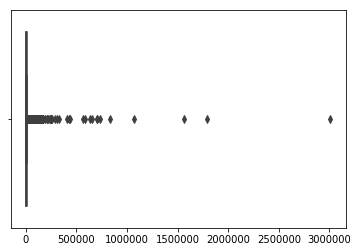

In [7]:
sns.boxplot(np.array(df['MonthlyIncome']))

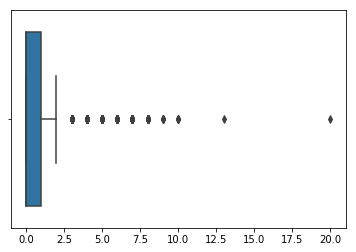

In [8]:
sns.boxplot(np.array(df['NumberOfDependents']))

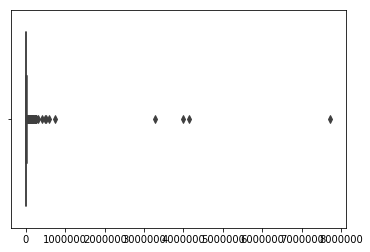

In [9]:
sns.boxplot(np.array(testing['MonthlyIncome']))

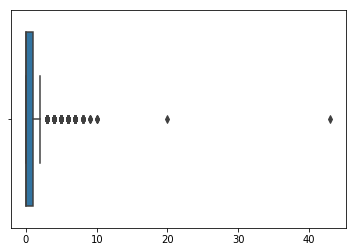

In [10]:
sns.boxplot(np.array(testing['NumberOfDependents']))

lot of outliers in income and dependents so cannot replace it with mean as it will be very high so will replace it by median

# Filling null values with median

In [11]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)
testing['MonthlyIncome'].fillna(testing['MonthlyIncome'].median(), inplace=True)
testing['NumberOfDependents'].fillna(testing['NumberOfDependents'].median(), inplace=True)

In [12]:
testing.isnull().sum()

Unnamed: 0                                    0
SeriousDlqin2yrs                         101503
RevolvingUtilizationOfUnsecuredLines          0
age                                           0
NumberOfTime30to59DaysPastDueNotWorse         0
DebtRatio                                     0
MonthlyIncome                                 0
NumberOfOpenCreditLinesAndLoans               0
NumberOfTimes90DaysLate                       0
NumberRealEstateLoansOrLines                  0
NumberOfTime60to89DaysPastDueNotWorse         0
NumberOfDependents                            0
dtype: int64

In [13]:
df.isnull().sum()

Unnamed: 0                               0
SeriousDlqin2yrs                         0
RevolvingUtilizationOfUnsecuredLines     0
age                                      0
NumberOfTime30to59DaysPastDueNotWorse    0
DebtRatio                                0
MonthlyIncome                            0
NumberOfOpenCreditLinesAndLoans          0
NumberOfTimes90DaysLate                  0
NumberRealEstateLoansOrLines             0
NumberOfTime60to89DaysPastDueNotWorse    0
NumberOfDependents                       0
dtype: int64

All the null values are filled in train and test except target

# Lets check other columns
NumberOfTimes90DaysLate.       NumberOfTime60to89DaysPastDueNotWorse.          NumberOfTime30to59DaysPastDueNotWorse.

In [14]:
df.groupby('NumberOfTimes90DaysLate').NumberOfTimes90DaysLate.count()

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [15]:
df.groupby('NumberOfTime60to89DaysPastDueNotWorse').NumberOfTime60to89DaysPastDueNotWorse.count()

NumberOfTime60to89DaysPastDueNotWorse
0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60to89DaysPastDueNotWorse, dtype: int64

In [16]:
df.groupby('NumberOfTime30to59DaysPastDueNotWorse').NumberOfTime30to59DaysPastDueNotWorse.count()

NumberOfTime30to59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30to59DaysPastDueNotWorse, dtype: int64

In training data all these columns have 96 and 98 as outliers. so will replace with the max values.

In [17]:
df.NumberOfTimes90DaysLate=df.NumberOfTimes90DaysLate.replace(98,17)
df.NumberOfTimes90DaysLate=df.NumberOfTimes90DaysLate.replace(96,17)
df.NumberOfTime60to89DaysPastDueNotWorse=df.NumberOfTime60to89DaysPastDueNotWorse.replace(98,11)
df.NumberOfTime60to89DaysPastDueNotWorse=df.NumberOfTime60to89DaysPastDueNotWorse.replace(96,11)
df.NumberOfTime30to59DaysPastDueNotWorse=df.NumberOfTime30to59DaysPastDueNotWorse.replace(98,13)
df.NumberOfTime30to59DaysPastDueNotWorse=df.NumberOfTime30to59DaysPastDueNotWorse.replace(96,13)

lets check one of the columns if the changes are reflected

In [18]:
df.groupby('NumberOfTimes90DaysLate').NumberOfTimes90DaysLate.count()

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17       270
Name: NumberOfTimes90DaysLate, dtype: int64

# lets check for test data for the same

In [19]:
testing.groupby('NumberOfTimes90DaysLate').NumberOfTimes90DaysLate.count()

NumberOfTimes90DaysLate
0     95785
1      3594
2      1062
3       445
4       191
5       102
6        44
7        26
8        19
9        14
10        2
11        1
12        1
16        1
17        1
18        1
96        1
98      213
Name: NumberOfTimes90DaysLate, dtype: int64

In [20]:
testing.groupby('NumberOfTime60to89DaysPastDueNotWorse').NumberOfTime60to89DaysPastDueNotWorse.count()

NumberOfTime60to89DaysPastDueNotWorse
0     96375
1      3863
2       731
3       216
4        61
5        25
6         7
7         7
8         1
9         3
96        1
98      213
Name: NumberOfTime60to89DaysPastDueNotWorse, dtype: int64

In [21]:
testing.groupby('NumberOfTime30to59DaysPastDueNotWorse').NumberOfTime30to59DaysPastDueNotWorse.count()

NumberOfTime30to59DaysPastDueNotWorse
0     85190
1     10837
2      3168
3      1201
4       510
5       205
6        88
7        42
8        28
9        10
10        7
11        1
12        1
19        1
96        1
98      213
Name: NumberOfTime30to59DaysPastDueNotWorse, dtype: int64

lets replace these outliers with max values

In [22]:
testing.NumberOfTimes90DaysLate=testing.	NumberOfTimes90DaysLate.replace(98,18)
testing.NumberOfTimes90DaysLate=testing.	NumberOfTimes90DaysLate.replace(96,18)
testing.NumberOfTime60to89DaysPastDueNotWorse=testing.NumberOfTime60to89DaysPastDueNotWorse.replace(98,9)
testing.NumberOfTime60to89DaysPastDueNotWorse=testing.NumberOfTime60to89DaysPastDueNotWorse.replace(96,9)
testing.NumberOfTime30to59DaysPastDueNotWorse=testing.NumberOfTime30to59DaysPastDueNotWorse.replace(98,19)
testing.NumberOfTime30to59DaysPastDueNotWorse=testing.NumberOfTime30to59DaysPastDueNotWorse.replace(96,19)

lets check one of the columns if the changes are reflected

In [23]:
testing.groupby('NumberOfTime30to59DaysPastDueNotWorse').NumberOfTime30to59DaysPastDueNotWorse.count()

NumberOfTime30to59DaysPastDueNotWorse
0     85190
1     10837
2      3168
3      1201
4       510
5       205
6        88
7        42
8        28
9        10
10        7
11        1
12        1
19      215
Name: NumberOfTime30to59DaysPastDueNotWorse, dtype: int64

changes are reflected

# Setting the test and train data

In [24]:
X_train = df.drop(["SeriousDlqin2yrs","Unnamed: 0"],axis=1)
Y_train = df["SeriousDlqin2yrs"]
X_test  = testing.drop(["SeriousDlqin2yrs","Unnamed: 0"],axis=1)

# Logistic Regression

In [28]:
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict_proba(X_test)

C:\Users\deodh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
sampleSubmission['Probability']=Y_pred

In [30]:
sampleSubmission.to_csv('logistic.csv')

# Random Forest

In [31]:
random_forest = RandomForestRegressor(n_estimators = 2)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

In [32]:
sampleSubmission['Probability']=Y_pred

In [33]:
sampleSubmission.to_csv('randomforest.csv')

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

# Naive Bayes

In [34]:
NB = GaussianNB()
NB.fit(X_train, Y_train)
Y_pred=NB.predict_proba(X_test)

In [35]:
sampleSubmission['Probability']=Y_pred

In [36]:
sampleSubmission.to_csv('NBg.csv')

one of the easiest ways of selecting the most probable hypothesis given the data that we have that we can use as our prior knowledge about the problem. Naive Bayes provides a way that we can calculate the probability of a hypothesis given our prior knowledge.After calculating  probabilities for a number of different hypotheses, naive bayes selects the hypothesis with the highest probability.

# XG Boost

In [25]:
XG = XGBClassifier()
XG.fit(X_train, Y_train)
Y_pred = XG.predict_proba(X_test)

In [26]:
Y_pred

array([[0.9210493 , 0.07895069],
       [0.954363  , 0.04563699],
       [0.9865254 , 0.01347459],
       ...,
       [0.9936135 , 0.00638653],
       [0.9184179 , 0.08158214],
       [0.95301926, 0.04698073]], dtype=float32)

In [27]:
sampleSubmission['Probability']=Y_pred
sampleSubmission.to_csv('XGboostbest.csv')

In Boosting we focus more on points which give wrong predictions. First we take a subset of training data and test it for predictions then the points which predict wrong are taken and combine with another random subset. This improves the accuracy based on the wrong prediction points.
XG Boosting is just a type of gradient boosting where it pushes more towards more to the extremeties of the decision trees to get the best accuracy.

# Summary
For this competition I have referred to only one public kernel - https://www.kaggle.com/simonpfish/comp-stats-group-data-project-final. I have reffered this for data cleaning methods. Among all the algorithms used XG boosting give the better AUC as it applies ensemble learning and focuses more on points which provide wrong predicition. Despite random forest being robust to outlers it didnt perform well for the probabilities.

# Conclusion
In this compition I had to find the probability if a person will face financial distress in 2 years. There was a lot of inconsistency in the dataset which had to be taken care of otherwise the models perform very poorly. Here I have used Logistic, Random forest, Naive bayes and Xg boosting models with 'predict_proba' method to get the probability. The best Auc of these models was provided by Xg boosting.

# # Contribution
60 % percent by me and 40 % by external resources

# # Citation

https://www.geeksforgeeks.org/

https://www.kaggle.com/simonpfish/comp-stats-group-data-project-final#

https://www.kaggle.com/c/GiveMeSomeCredit

https://xgboost.readthedocs.io/en/latest/python/python_api.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://stats.stackexchange.com/questions/33185/difference-between-naive-bayes-multinomial-naive-bayes

https://github.com/nikbearbrown/INFO_6105/blob/master/Assignments/INFO_6105_Assignment_2.ipynb

# Licence
Copyright 2019 Mayuresh Deodhar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.